   # Geely Automotive Pricing Model
  #  By: MAANIK SHARMA

## Multiple Linear Regression
### Step 1: Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 75)


import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
%matplotlib inline


# Importing RFE and LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
car_master= pd.read_csv("CarPrice_Assignment.csv")
car_master.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car dataframe..

In [3]:
car_master.shape

(205, 26)

In [4]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
##As for analysis Car_id value is not significant so we'll dropping the columns
car_master= car_master.drop('car_ID', axis=1)

In [6]:
# Extracting Car Company name from the CarName as per direction in Problem 
car_master['CarName'] = car_master['CarName'].str.split(' ').str[0]


In [7]:
car_master['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typing mistake in Car Company's name**
    
toyota = toyouta,
porsche = porcshce,
Nissan = nissan,
maxda = mazda,
vokswagen = volkswagen = vw

In [8]:
# Let's correct and rename the Car Company's names
car_master['CarName'] = car_master['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
# As per the data dictionary symboling column is categorail column so lets change the datatype of this column
car_master['symboling'] = car_master['symboling'].astype(str)

In [10]:
car_master.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [12]:
car_master.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
# Lets check for duplicate row
car_master.loc[car_master.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
# Lets create database Numerical and Categorical, Variables/Columns and create two dataframe
categorical_col = car_master.select_dtypes(include=['object']).columns
numerical_col = car_master.select_dtypes(exclude=['object']).columns
cat_df = car_master[categorical_col]
num_df = car_master[numerical_col]

In [15]:
num_df.shape

(205, 14)

In [16]:
cat_df.shape

(205, 11)

In [17]:
cat_df.columns.unique()

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

### Step 2: Visualising  and Cleaning the Data


#### Visualising Numeric Variables

Let us draw a pairplot of all the numeric variables

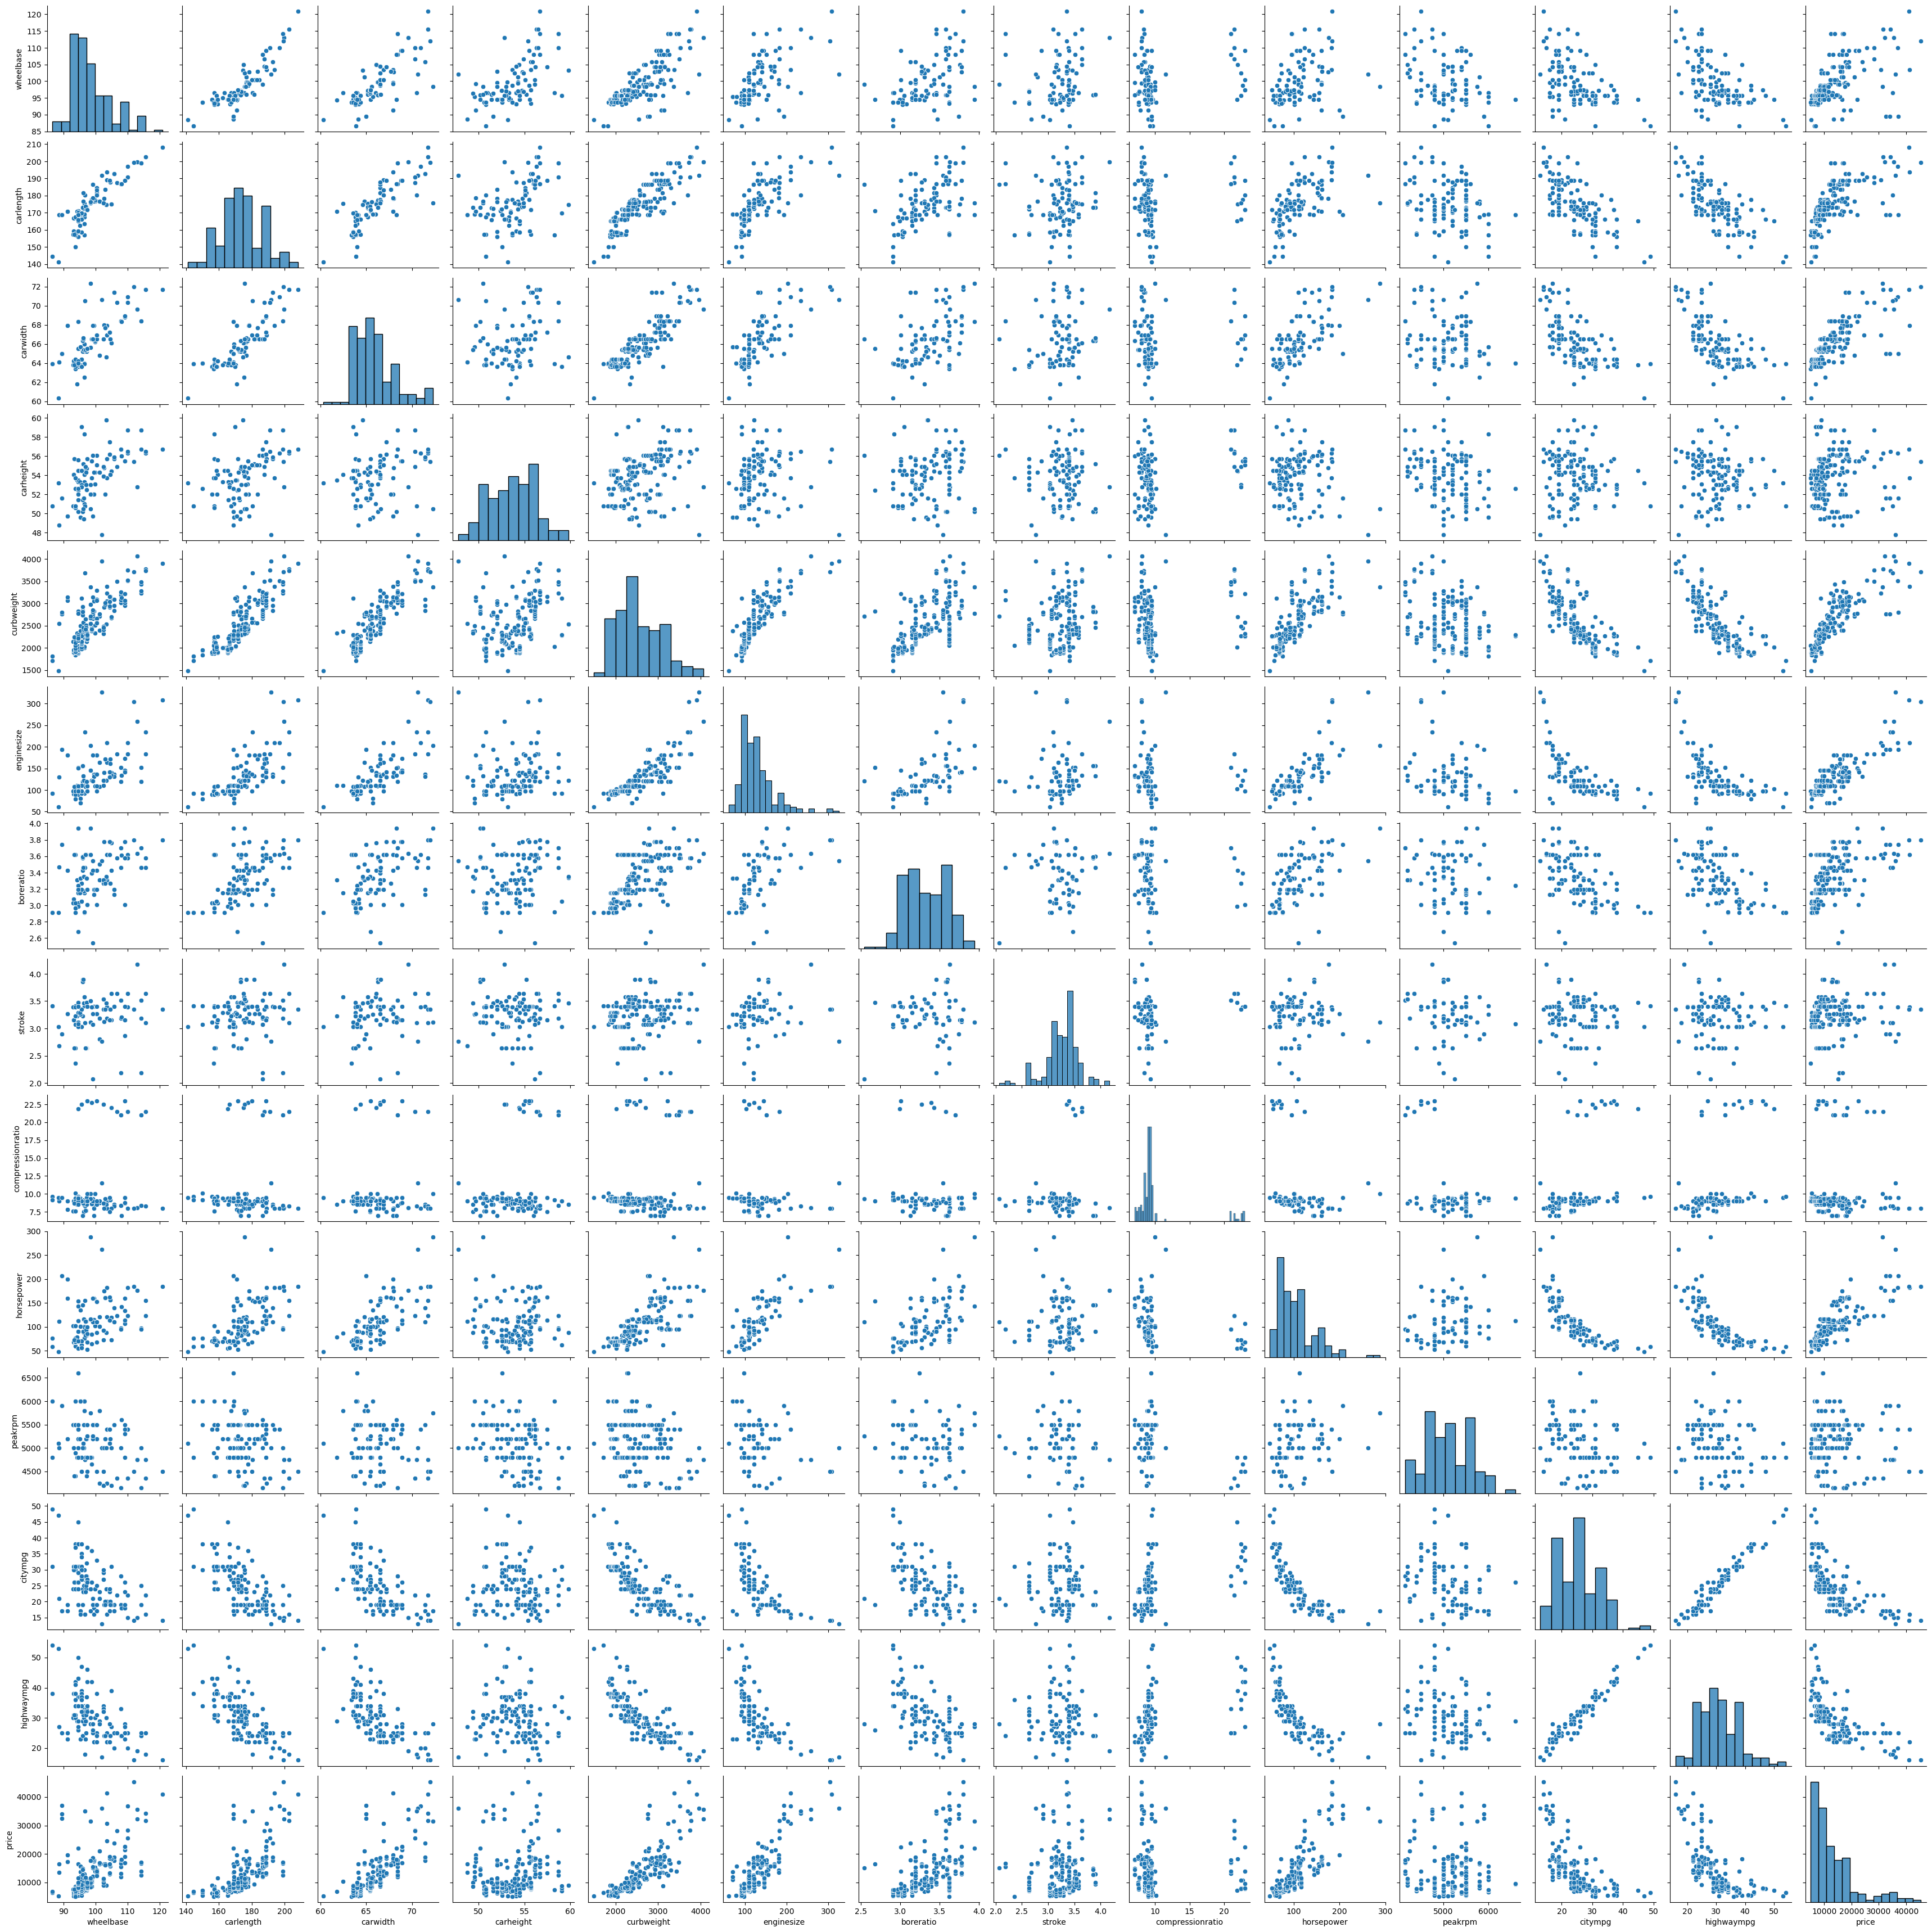

In [18]:
sns.pairplot(num_df)
plt.show()

#### Visualising Categorical Variables

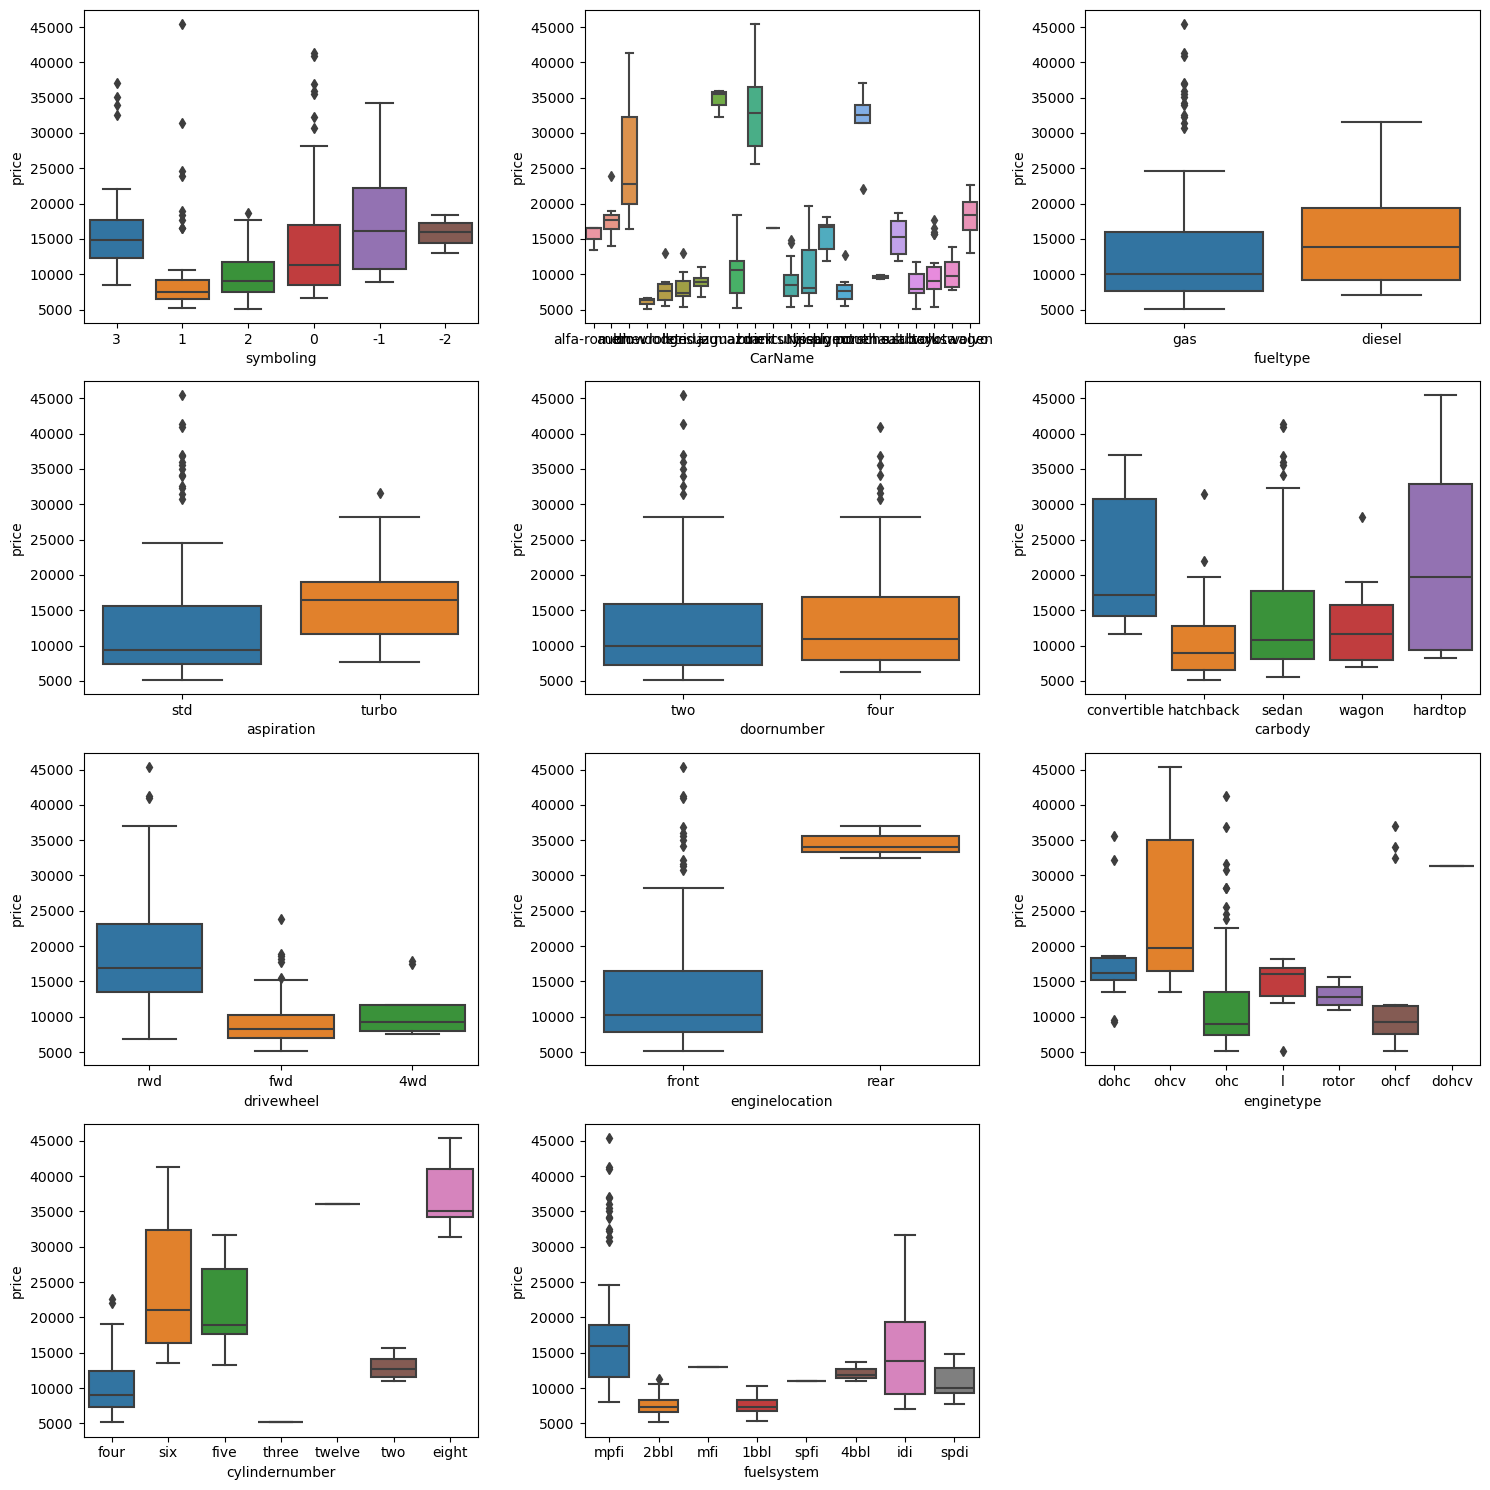

In [19]:
plt.figure(figsize=(15, 15))
def plot_box(df,x_variable):
    for idx, val in enumerate(x_variable, start=1):
        plt.subplot(4,3,idx)
        sns.boxplot(x = val, y = 'price', data = df)
    plt.tight_layout()    
    plt.show()

plot_box(car_master,x_variable=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'])

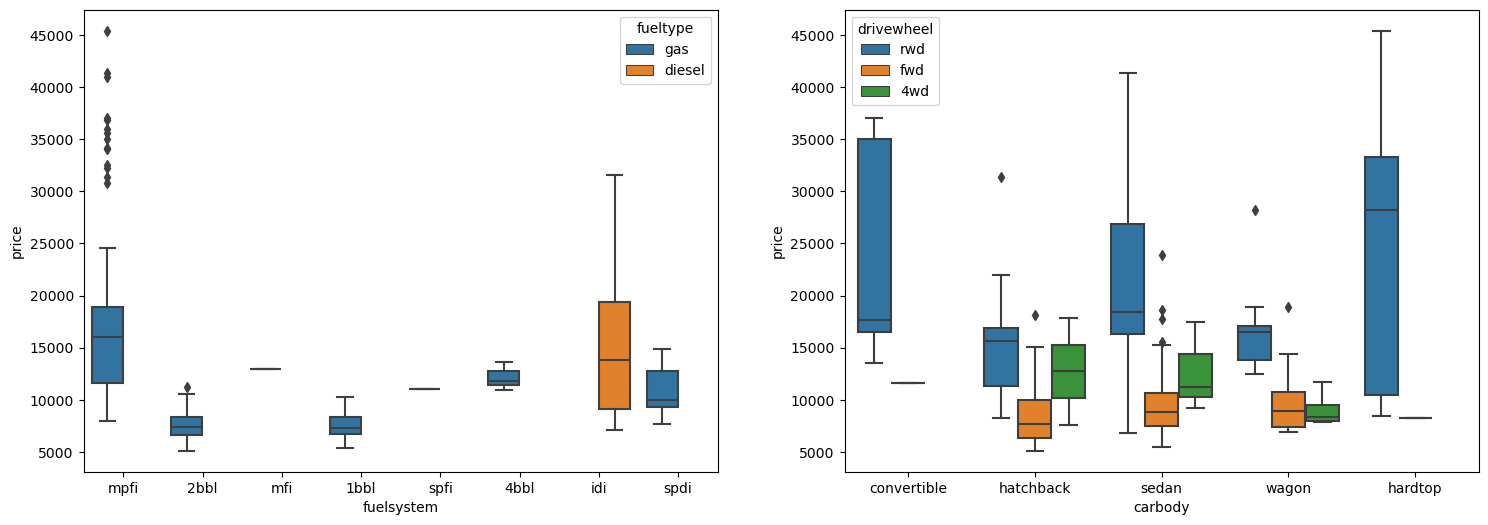

In [20]:
plt.figure(figsize = (18 ,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'fuelsystem', y = 'price', hue = ('fueltype'), data = car_master)
plt.subplot(1,2,2)
sns.boxplot(x = 'carbody', y = 'price', hue = ('drivewheel'), data = car_master)
plt.show()

#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

### Step 3: Data Preparation

In [21]:
sig_cat_col = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation',
               'enginetype', 'cylindernumber', 'fuelsystem']

In [22]:
# Lets get the dummy variables for the categorical feature.
dummies = pd.get_dummies(car_master[sig_cat_col])
dummies.shape

(205, 66)

In [23]:
dummies = pd.get_dummies(car_master[sig_cat_col], drop_first = True)
dummies.shape

(205, 55)

In [24]:
# Lets add the results to the car_master dataframe
car_master = pd.concat([car_master, dummies], axis = 1)
pd.set_option('display.max_columns', 75)

In [25]:
car_master.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,...,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
204,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [26]:
# Lets drop the original cat variables as dummies were already created
car_master.drop(sig_cat_col, axis = 1, inplace = True)
car_master.shape

(205, 69)

In [27]:
car_master.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


### Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [28]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_test.shape

(62, 69)

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impacts the model. well it becomes extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients which we obtained by fitting the regression model might be huge or very small as compared to the other coefficients.

There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 


This time, we will use MinMax scaling.

In [30]:
scaler = MinMaxScaler()

In [31]:
sig_num_col =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
              'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

In [32]:
# Apply scaler() to all the columns except the 'dummy' variables
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [33]:
df_train.shape

(143, 69)

In [34]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


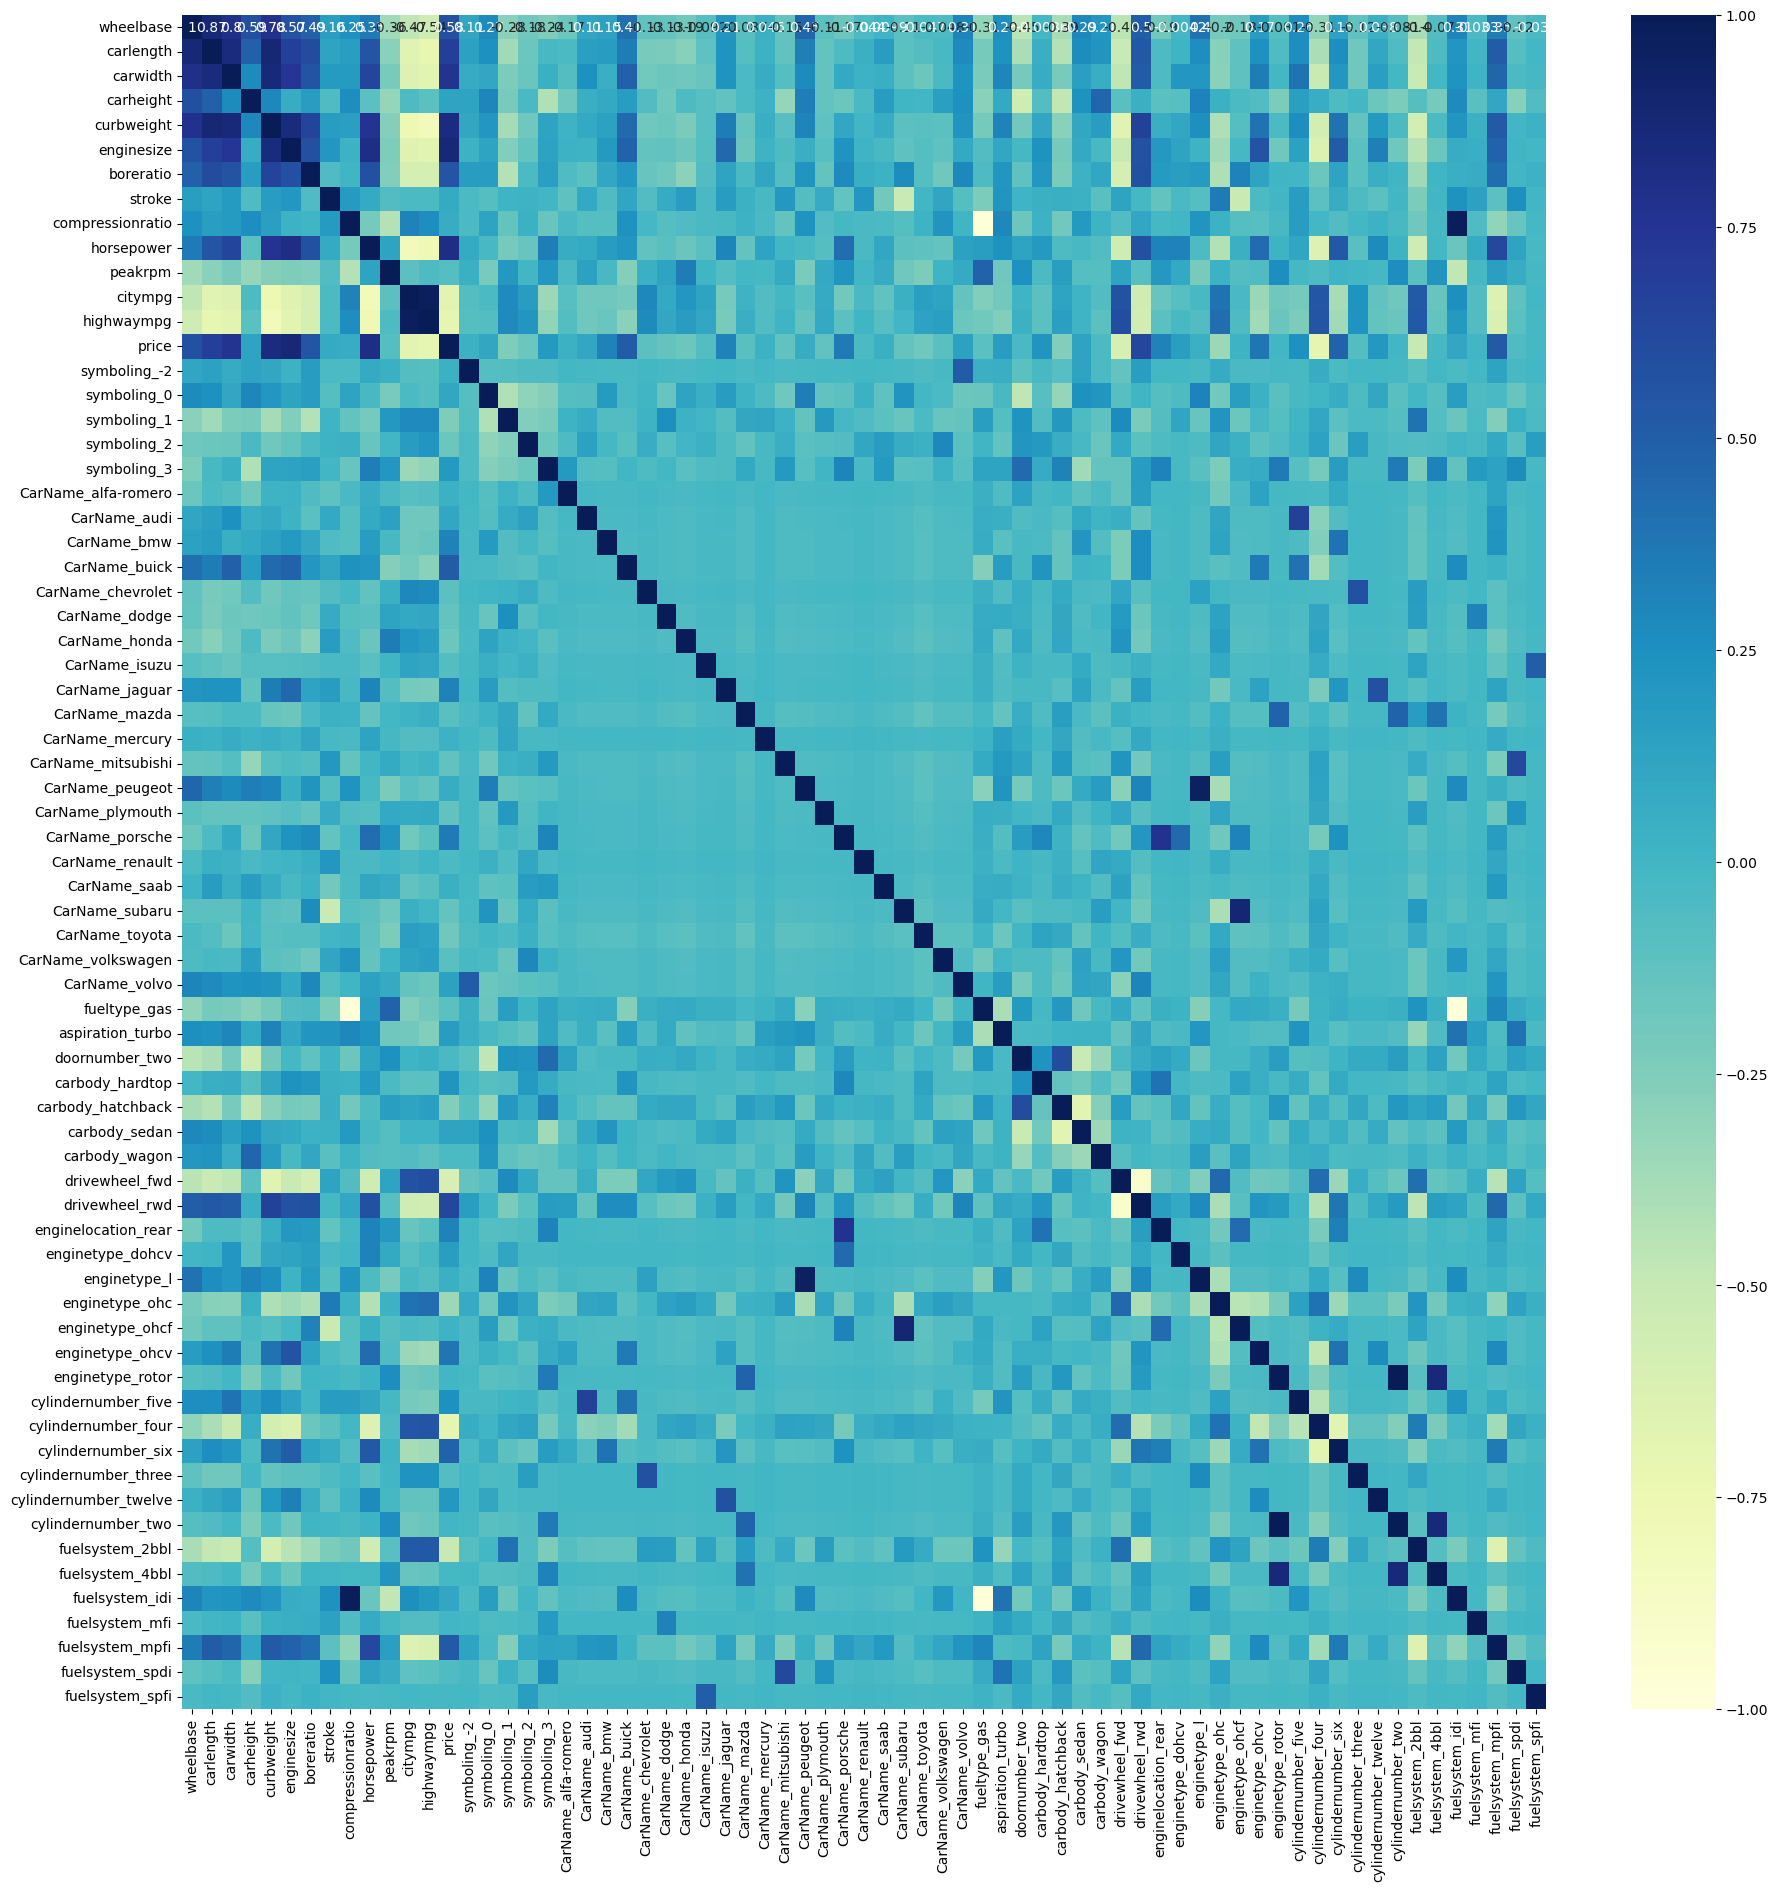

In [35]:
# Lets check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22, 22))
sns.heatmap(car_master.corr(), cmap="YlGnBu",annot= True)
plt.show()

Lets watch scatterplot for few correlated variables vs price.

#### Dividing into X and Y sets for the model building

In [36]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [37]:
df_train.shape

(143, 69)

In [38]:
y_train = df_train.pop('price')
X_train = df_train
X_train.shape

(143, 68)

In [39]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
186,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
59,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
165,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
140,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False


### Step 5: Building a Linear Model

###   Recursive Feature Elimination (RFE)
Lets use Recursive feature elimination since we have various independent variables

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# running RFE
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)


In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 34),
 ('carlength', False, 33),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 23),
 ('peakrpm', False, 17),
 ('citympg', False, 37),
 ('highwaympg', False, 30),
 ('symboling_-2', False, 8),
 ('symboling_0', False, 47),
 ('symboling_1', False, 45),
 ('symboling_2', False, 46),
 ('symboling_3', False, 42),
 ('CarName_alfa-romero', False, 43),
 ('CarName_audi', False, 22),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 16),
 ('CarName_chevrolet', False, 32),
 ('CarName_dodge', False, 20),
 ('CarName_honda', False, 19),
 ('CarName_isuzu', False, 48),
 ('CarName_jaguar', False, 29),
 ('CarName_mazda', False, 56),
 ('CarName_mercury', False, 57),
 ('CarName_mitsubishi', False, 12),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 18),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'CarName_bmw',
       'CarName_porsche', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CarName_alfa-romero', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       '

In [45]:
# Lets create X_train dataframe with RFE selected variables and observe the summary of our linear model
X_train_rfe_1 = X_train[col]
X_train_lm_1 = sm.add_constant(X_train_rfe_1.astype(float))
y_train = y_train.astype(float)
lm_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.21e-64
Time:                        06:43:46   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

### Checking Variance Inflation Factor (VIF)

Variance Inflation Factor or VIF, gives us a basic quantative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Calculate the VIFs for the new model
X = X_train_rfe_1.astype(float)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
5,CarName_porsche,1.67
6,enginelocation_rear,1.61
9,cylindernumber_twelve,1.50
7,enginetype_rotor,1.27
4,CarName_bmw,1.18
8,cylindernumber_three,1.01


**Lets drop the variable and update the model**

**Lets drop `cylindernumber_twelve` because it's `p-value` is `0.511` and we want p-value less than 0.05 , so lets rebuild the model**

In [47]:
X_train_rfe_2 = X_train_rfe_1.drop(["cylindernumber_twelve"], axis = 1)

In [48]:
X_train_rfe_2 = X_train_rfe_2.astype(float)
y_train = y_train.astype(float)
# Running the linear model
X_train_lm_2 = sm.add_constant(X_train_rfe_2)
lm_2 = sm.OLS(y_train, X_train_lm_2).fit()
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.18e-65
Time:                        06:43:46   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
5,CarName_porsche,1.66
6,enginelocation_rear,1.60
7,enginetype_rotor,1.21
4,CarName_bmw,1.14
8,cylindernumber_three,1.01


**Let us drop some `curbweight` beacuse VTF value is `38.41` and we want VTF value to be less than 5, therefore we are rebuilding the model.**

In [50]:
X_train_rfe_3 = X_train_rfe_2.drop(["curbweight"], axis = 1)

In [51]:
X_train_lm_3 = sm.add_constant(X_train_rfe_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           2.01e-63
Time:                        06:43:46   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [52]:
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
5,enginelocation_rear,1.60
4,CarName_porsche,1.59
6,enginetype_rotor,1.17
3,CarName_bmw,1.14
7,cylindernumber_three,1.01


**Lets drop `carwidth` beacuse VTF value is `16.48` and we want VTF value to be less than 5, therefore we are rebuilding the model again.**

In [53]:
X_train_rfe_4 = X_train_rfe_3.drop(["carwidth"], axis = 1)

In [54]:
X_train_lm_4 = sm.add_constant(X_train_rfe_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           4.68e-51
Time:                        06:43:46   Log-Likelihood:                 149.21
No. Observations:                 143   AIC:                            -282.4
Df Residuals:                     135   BIC:                            -258.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0912 

In [55]:
vif = pd.DataFrame()
X = X_train_rfe_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,5.49
0,enginesize,5.47
3,CarName_porsche,1.59
4,enginelocation_rear,1.51
2,CarName_bmw,1.10
5,enginetype_rotor,1.10
6,cylindernumber_three,1.00


**Let us drop `boreratio` beacuse VTF value is `5.49` and we want VTF value to be less than 5, therefore we are rebuilding the model.**

In [56]:
X_train_rfe_5 = X_train_rfe_4.drop(["boreratio"], axis = 1)

In [57]:
X_train_lm_5 = sm.add_constant(X_train_rfe_5)
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     121.2
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           4.57e-52
Time:                        06:43:46   Log-Likelihood:                 149.08
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     136   BIC:                            -263.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0843 

In [58]:
vif = pd.DataFrame()
X = X_train_rfe_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CarName_porsche,1.56
3,enginelocation_rear,1.50
0,enginesize,1.16
1,CarName_bmw,1.10
4,enginetype_rotor,1.00
5,cylindernumber_three,1.00


**The VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_5` and `lm_3`.**

###  MODEL I
- With `lm_5` which has basically 6 predictor variables.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), lets plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_price = lm_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

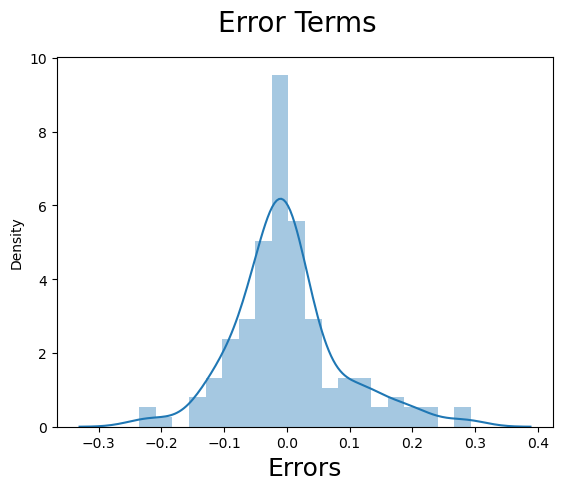

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 8: Making Predictions

In [61]:
sig_num_col =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']


In [62]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 69)

#### Dividing into X_test and y_test


In [63]:
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_lm_5.columns]

In [65]:
# Making predictions using the final model
y_pred = lm_5.predict(X_test_new)

### Step 9: Model Evaluation

Now letsplot the graph for realtime vs predicted values.

Text(0, 0.5, 'y_pred')

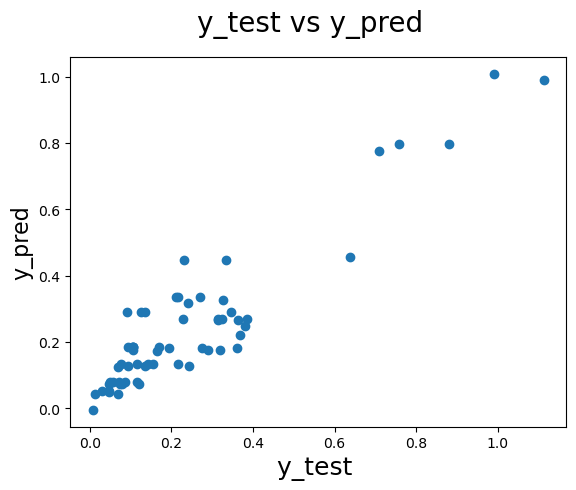

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8559773795402238

**The R2 score of Training set is 0.855 and Test set is 0.855 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**


* enginesize               
* CarName_bmw              	
* CarName_porsche          
* enginelocation_rear      
* cylindernumber_three     
* cylindernumber_two                         
        

#### Equation of Line to predict the Car prices values

$ Carprice = -0.0843 +  1.1724  \times  enginesize + 0.2047  \times  CarNamebmw +  0.1676 \times CarNameporsche  + 0.1270 \times enginelocationrear  + 0.0852 \times cylindernumberThree - 0.2517 \times ccylindernumberTwo $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.842 and 0.836 .
- F-stats and Prob(F-stats) (overall model fit) 121.2 and 1.57e-70(approx. 0.0) - Model fit is significant.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

____________________________________________________________________________________________

### MODEL II
- With `lm_3` which has basically 8 predictor variables.

### Step 7: Residual Analysis of the train data

In [68]:
y_train_price = lm_3.predict(X_train_lm_3)

Text(0.5, 0, 'Errors')

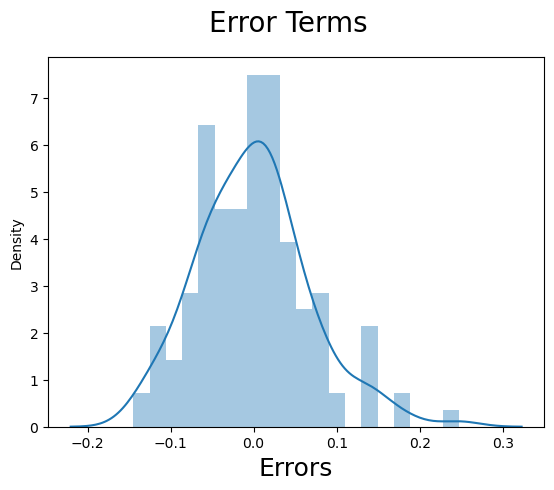

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Step 8: Making Predictions

In [70]:
X_test_new = X_test_1[X_train_lm_3.columns]

In [71]:
# Making predictions using the final model
y_pred = lm_3.predict(X_test_new)

### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.


##### Plotting y_test and y_pred to understand the spread.


Text(0, 0.5, 'y_pred')

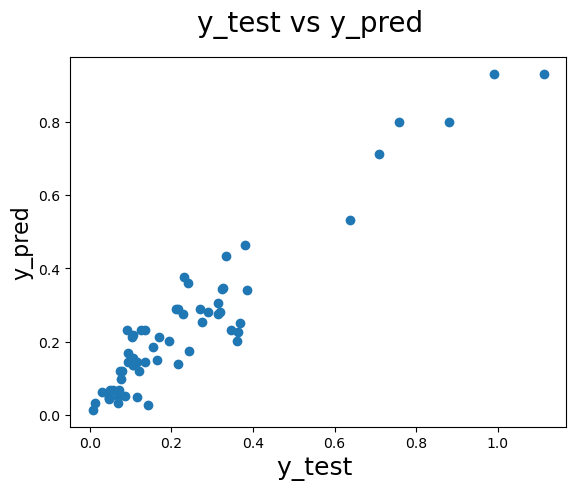

In [72]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    


### RMSE Score

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9037558420336881

**The R2 score of Training set is 0.903 and Test set is 0.903 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**


* carwidth                
* enginesize               
* boreratio               
* CarName_bmw              
* CarName_porsche          
* enginelocation_rear      
* cylindernumber_three     
* cylindernumber_two    

#### Equation of Line to predict the Car prices values

$ Carprice = -0.1778 +  0.4952  \times  carwidth + 0.7451  \times  enginesize - 0.0657 \times boreratio  + 0.2499 \times CarNameBmw  + 0.1012 \times CarNamePorsche + 0.3627 \times enginelocationRear +0.1907\times cylindernumberThree +0.1748\times  cylindernumberTwo $

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.901 and 0.895 .
- F-stats and Prob(F-stats) (overall model fit) 152.5 and 2.01e-63(approx. 0.0) - Model fit is significant.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.